<a href="https://colab.research.google.com/github/Cool-fire/Regression-Analysis-on-Air-Quality-Dataset/blob/master/airQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install --upgrade seaborn
#!pip3 install seaborn
!pip3 install xlrd

!pip install --upgrade scikit-learn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.1)


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Importing Dependencies**

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [0]:
path = "/content/drive/My Drive/Colab Notebooks/AirQuality.xlsx"

In [0]:
dataset = pd.read_excel(path)

In [0]:
dataset.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [0]:
dataset.shape

(9357, 15)

**check for null values**


In [0]:
dataset.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [0]:
dataset.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 1.1+ MB


**There are no null values in the data but there are values like -200 which means data not available so we will first replace these -200 values with Nan values**

In [0]:
!pip3 install --upgrade numpy

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.15.4)


In [0]:
import numpy as np
dataset.replace(to_replace = -200, value = np.nan, inplace=True)

In [0]:
null_values = dataset.isnull().sum()
null_values

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Text(0.5,1,'null values in dataset')

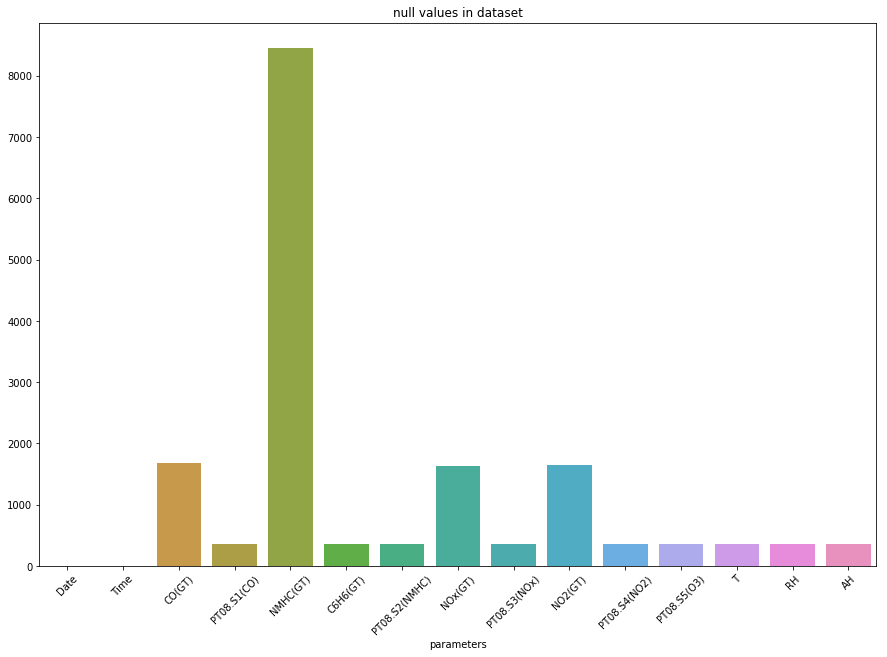

In [0]:
plt.figure(figsize=(15,10))
sb.barplot(x = dataset.columns, y = list(map(lambda x : dataset[x].isnull().sum(),dataset.columns) ))
plt.xticks(rotation = 45)
plt.xlabel("parameters")
plt.title("null values in dataset")

**NMHC(GT) column has lot of null values and it doesnt provide much information so we will remove the column**

In [0]:
dataset.drop(['NMHC(GT)'],axis=1,inplace = True)

In [0]:
dataset['DateTime'] = dataset['Date'].astype('str')+' '+dataset['Time'].astype('str')

In [0]:
dataset['DateTime'] = pd.to_datetime(dataset['DateTime'].astype('str'),format = "%Y/%m/%d %H:%M:%S")

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           7674 non-null float64
PT08.S1(CO)      8991 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
DateTime         9357 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(12), object(1)
memory usage: 1.1+ MB


In [0]:
year = list(map(lambda x : x.year,dataset['DateTime']))

In [0]:
dataset['year'] = pd.DataFrame(year)

In [0]:
dataset['YearMonth'] = dataset.DateTime.dt.to_period('m')

In [0]:
dataset.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
DateTime            0
year                0
YearMonth           0
dtype: int64

**filling nan values with mean value of that date**

In [0]:
dataset['T'] = dataset.groupby(['Date'])['T'].apply(lambda x : x.fillna(x.mean()))

In [0]:
dataset['RH'] = dataset.groupby(['Date'])['RH'].apply(lambda x : x.fillna(x.mean()))

In [0]:
dataset['AH'] = dataset.groupby(['Date'])['AH'].apply(lambda x : x.fillna(x.mean()))

In [0]:
dataset['CO(GT)'] = dataset.groupby(['Date'])['CO(GT)'].apply(lambda x : x.fillna(x.mean()))

In [0]:
dataset['NOx(GT)'] = dataset.groupby(['Date'])['NOx(GT)'].apply(lambda x : x.fillna(x.mean()))

In [0]:
dataset['NO2(GT)'] = dataset.groupby(['Date'])['NO2(GT)'].apply(lambda x : x.fillna(x.mean()))

**check if there are any null values in the data**

In [0]:
dataset.isna().any()

Date             False
Time             False
CO(GT)            True
PT08.S1(CO)       True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
DateTime         False
year             False
YearMonth        False
dtype: bool

**There are still missing values because there is no data for whole day so the values are nan we can fill the values or we can delete the whole row, we are filling the null values with the previous row data**

In [0]:
dataset.fillna(method='ffill',inplace=True)

In [0]:
dataset.isna().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
DateTime         False
year             False
YearMonth        False
dtype: bool

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
DateTime         9357 non-null datetime64[ns]
year             9357 non-null int64
YearMonth        9357 non-null object
dtypes: datetime64[ns](2), float64(12), int64(1), object(2)
memory usage: 1.2+ MB


In [0]:
dataset.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.082589,1102.604396,10.190299,942.422741,239.406473,832.618539,109.369051,1452.890358,1030.388426,18.165706,49.286349,1.018346,2004.240141
std,1.383347,219.599578,7.565011,269.583076,200.825951,255.704654,46.047394,347.427351,410.906048,8.834563,17.199988,0.403606,0.427192
min,0.100000,647.250000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679,2004.000000
25%,1.100000,938.250000,4.401596,732.500000,102.000000,654.500000,76.000000,1227.750000,726.000000,11.475000,36.129412,0.727607,2004.000000
50%,1.700000,1061.500000,8.276765,910.500000,176.521739,806.750000,103.600000,1459.750000,963.750000,17.575000,49.550000,0.988105,2004.000000
75%,2.700000,1237.250000,14.019301,1117.250000,316.000000,967.500000,135.000000,1676.750000,1286.500000,24.350000,62.549999,1.309925,2004.000000
max,11.900000,2039.750000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036,2005.000000


**Exploratoray analysis**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1cd9d0ef0>,
      dtype=object)

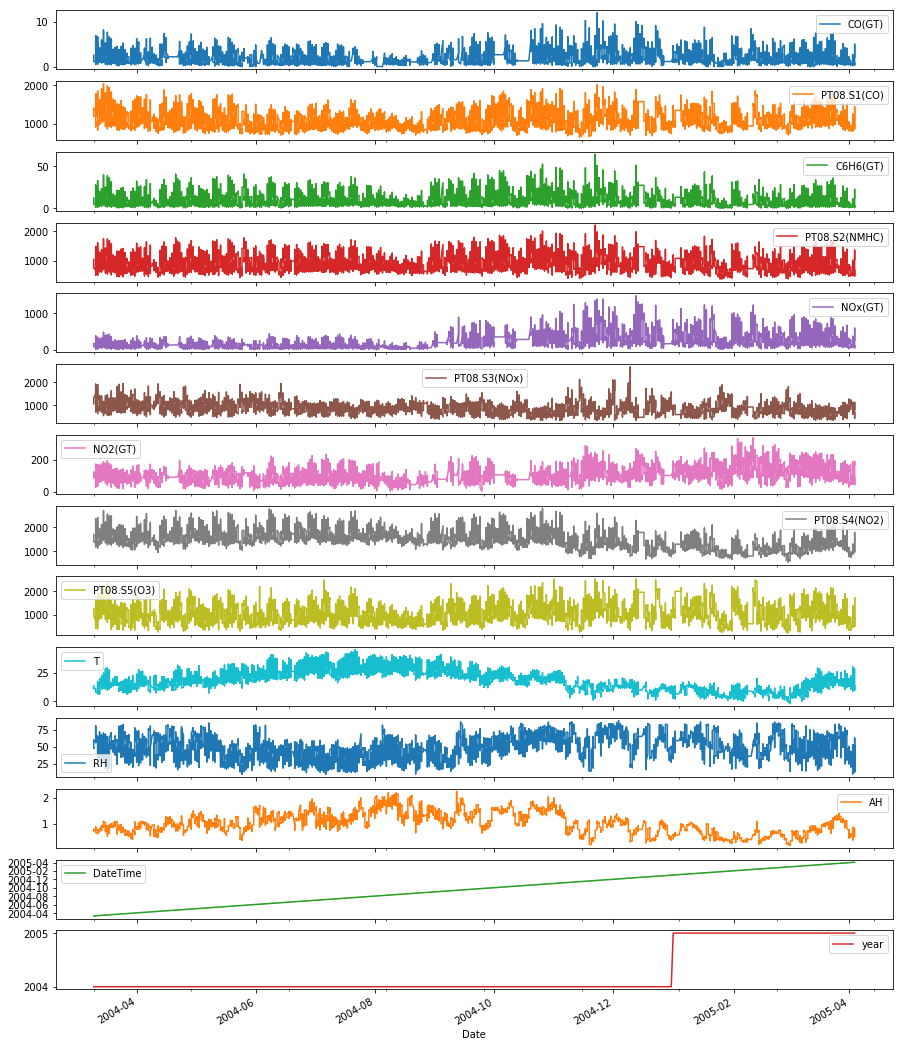

In [0]:
dataset.plot(x="Date",figsize=(15,20),subplots = True)

**Distributions of the features in the dataset the distributions are not totally normal but are some what normal**

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


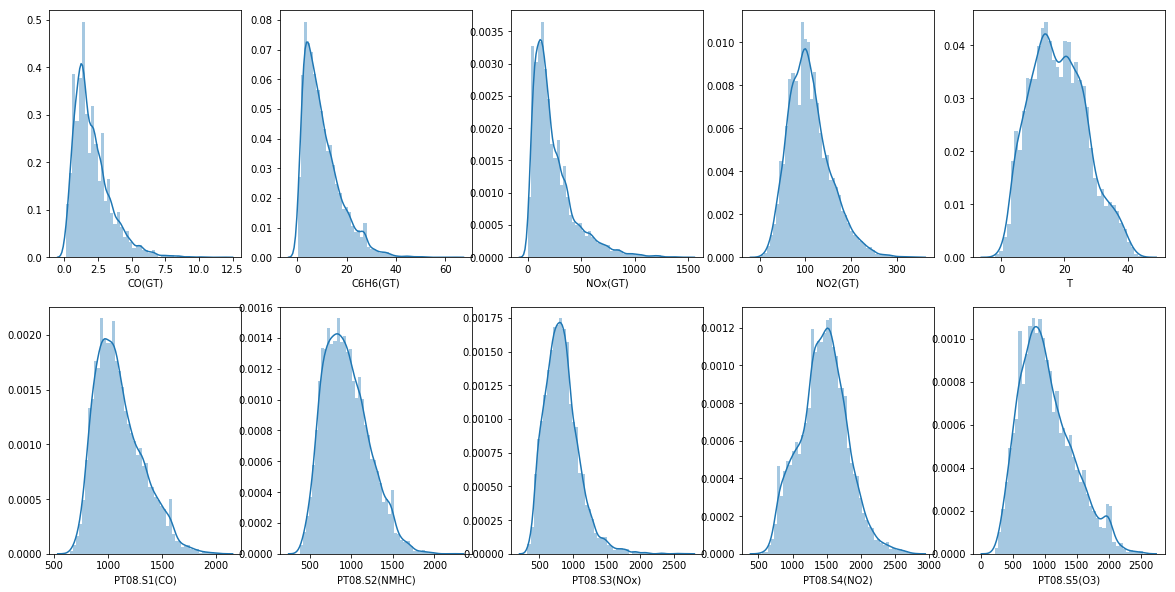

In [0]:
fig ,axes = plt.subplots(2,5,figsize = (20,10)) 
sb.distplot(dataset['CO(GT)'],ax=axes[0][0])
sb.distplot(dataset['PT08.S1(CO)'],ax=axes[1][0])
sb.distplot(dataset['PT08.S2(NMHC)'],ax=axes[1][1])
sb.distplot(dataset['C6H6(GT)'],ax=axes[0][1])
sb.distplot(dataset['NOx(GT)'],ax = axes[0][2])
sb.distplot(dataset['NO2(GT)'],ax = axes[0][3])
sb.distplot(dataset['PT08.S3(NOx)'],ax = axes[1][2])
sb.distplot(dataset['PT08.S4(NO2)'],ax = axes[1][3])
sb.distplot(dataset['PT08.S5(O3)'],ax = axes[1][4])
sb.distplot(dataset['T'],ax = axes[0][4])

fig.show()

In [0]:
!pip3 install seaborn==0.9.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Increase or Decrease of Concentration of AH across the month')

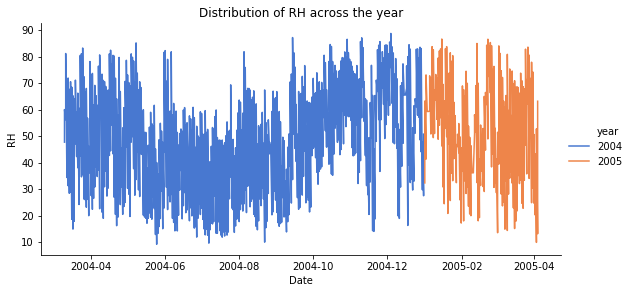

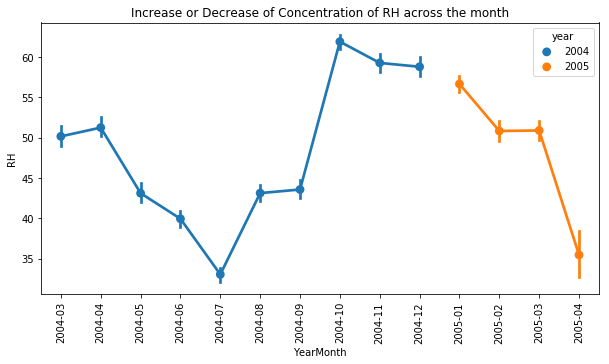

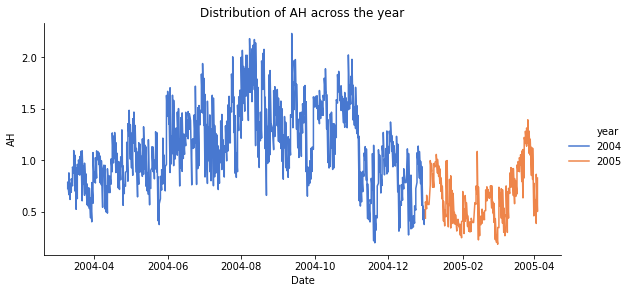

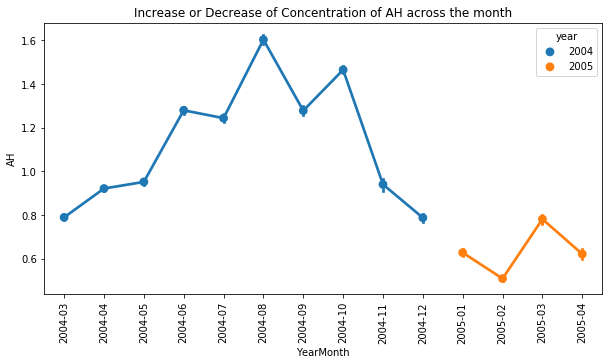

In [0]:
sb.relplot(x = "Date",y="RH",kind="line",estimator = None,hue = "year",palette=sb.color_palette("muted",n_colors = 2),data = dataset,height = 4,aspect = 2)
plt.title('Distribution of RH across the year')

plt.figure(figsize=(10,5))
sb.pointplot(x = "YearMonth", y= "RH", kind = "line",hue = "year",data=dataset)
plt.xticks(rotation =90)
plt.title("Increase or Decrease of Concentration of RH across the month")

sb.relplot(x = "Date",y="AH",kind="line",estimator = None,hue = "year",palette=sb.color_palette("muted",n_colors = 2),data = dataset,height = 4 ,aspect = 2)
plt.title('Distribution of AH across the year')

plt.figure(figsize=(10,5))
sb.pointplot(x = "YearMonth", y= "AH", kind = "line",hue = "year",data=dataset)
plt.xticks(rotation =90)
plt.title("Increase or Decrease of Concentration of AH across the month")

**Humans are very sensitive to humidity, as the skin relies on the air to get rid of moisture. The process of sweating is your body's attempt to keep cool and maintain its current temperature. If the air is at 100-percent relative humidity, sweat will not evaporate into the air. As a result, we feel much hotter than the actual temperature when the relative humidity is high. If the relative humidity is low, we can feel much cooler than the actual temperature because our sweat evaporates easily, cooling us off. so lets take Relative humidity as Dependent variable and remaining all as independent variables**

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Distribution of AH')

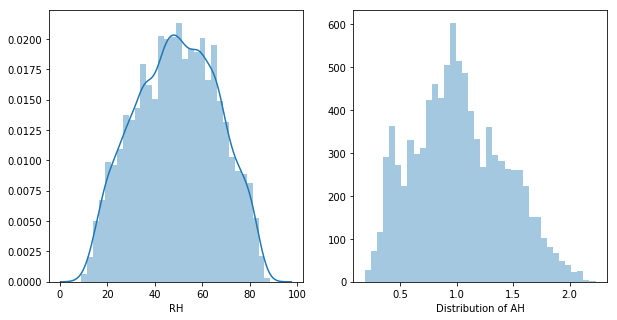

In [0]:
fig ,axes = plt.subplots(1,2,figsize = (10,5)) 
sb.distplot(dataset['RH'],kde = True ,ax=axes[0])

sb.distplot(dataset['AH'],kde = False ,ax=axes[1])
plt.xlabel("Distribution of AH")




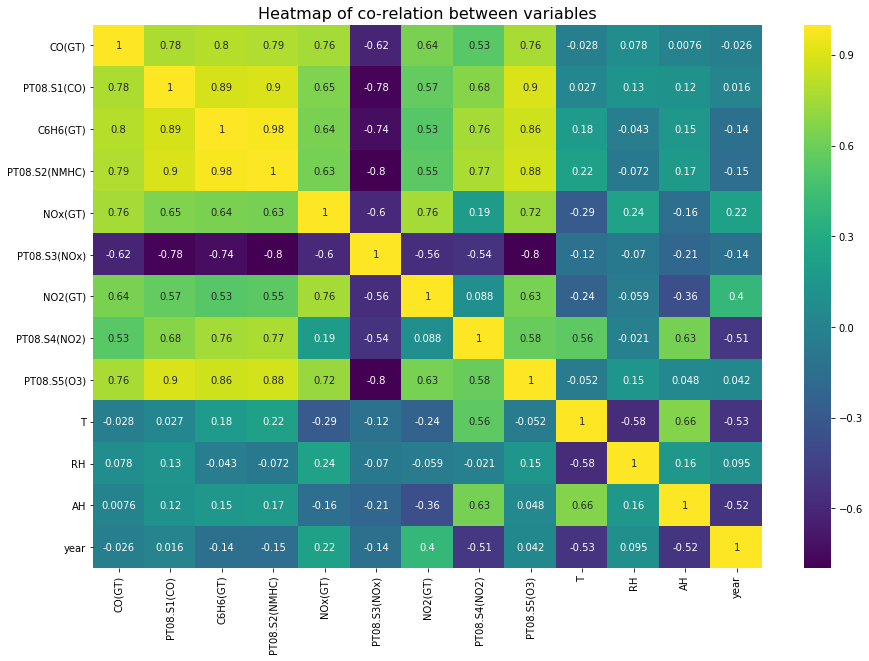

In [0]:
#Heat map of variables
plt.figure(figsize=(15,10))
sb.heatmap(dataset.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.xticks(rotation = 90)
plt.show()

**Assumption of mlr are linearity,Normality,HomoSkedacity,No MultiCollinearity**

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


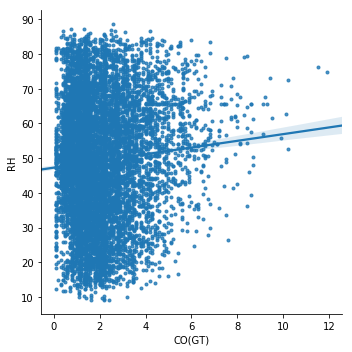

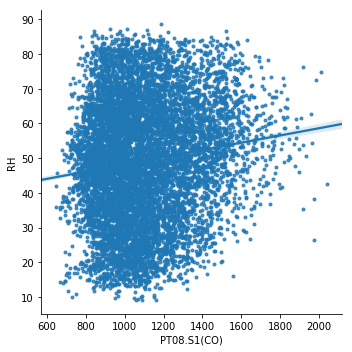

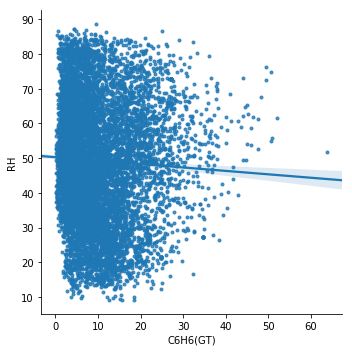

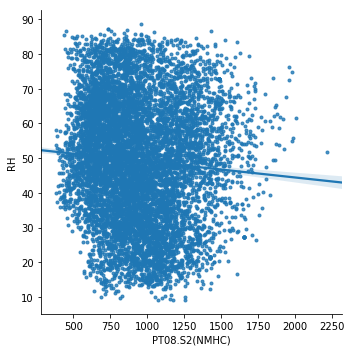

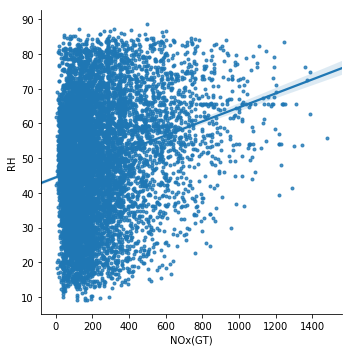

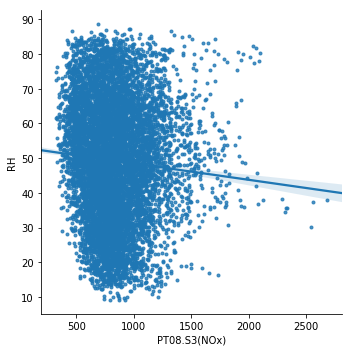

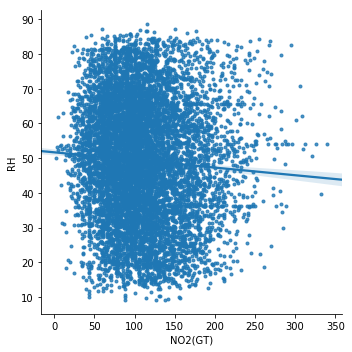

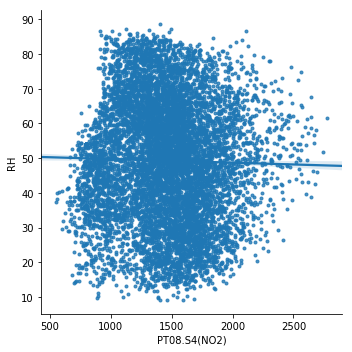

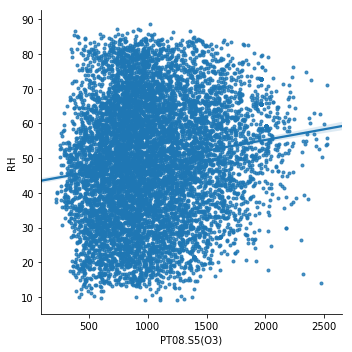

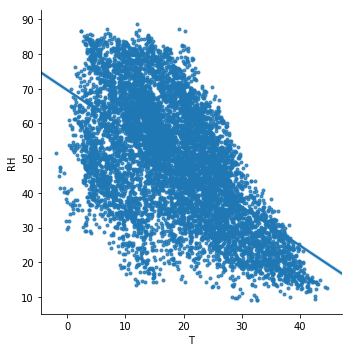

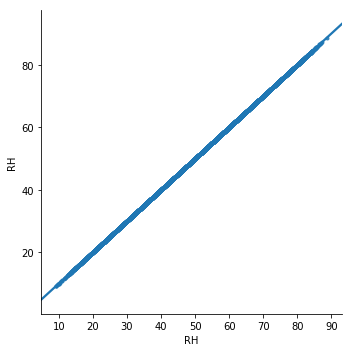

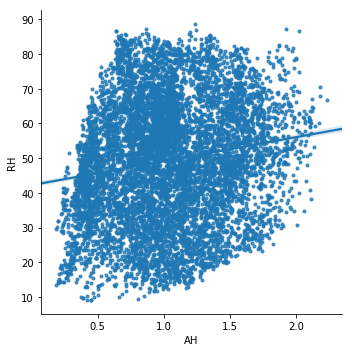

In [0]:
#checking for linearity there shouldnot be any curve in the scatterplot
col_= dataset.columns[2:-3]
for i in col_:
    sb.lmplot(x=i,y='RH',data=dataset,markers='.')

**From the scatterplots it is known that the data is linear**

In [0]:
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
y = dataset[['RH','AH']]
data = dataset.drop(['RH','AH'],axis=1)
x = data.iloc[:,2:-3]

In [0]:
ss = StandardScaler()
x_std = ss.fit_transform(x)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [0]:
#for RH
x2 = sm.add_constant(x_train)
est = sm.OLS(y_train.iloc[:,0],x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     RH   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     2346.
Date:                Wed, 28 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:46:17   Log-Likelihood:                -22932.
No. Observations:                6549   AIC:                         4.589e+04
Df Residuals:                    6538   BIC:                         4.596e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            84.1017      2.319     36.265

In [0]:
z2 = sm.add_constant(x_train)
mst = sm.OLS(y_train.iloc[:,1],z2)
mst2 = mst.fit()
print(mst2.summary())


                            OLS Regression Results                            
Dep. Variable:                     AH   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     3267.
Date:                Wed, 28 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:46:17   Log-Likelihood:                 2503.2
No. Observations:                6549   AIC:                            -4984.
Df Residuals:                    6538   BIC:                            -4910.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4978      0.048     31.396

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Residuals')

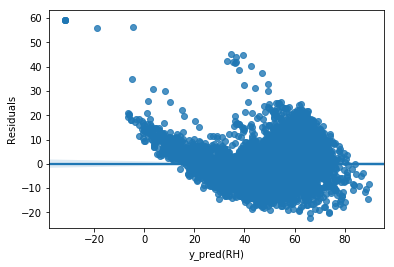

In [0]:
x3 = sm.add_constant(x_train)
y_train_pred1 = est2.predict(x3)
resid1 = (y_train.iloc[:,0] - y_train_pred1)
sb.regplot(y_train_pred1,resid1)
plt.xlabel("y_pred(RH)")
plt.ylabel("Residuals")


#from the residual plots it can be shown for linearity and homoskedacity

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Residuals')

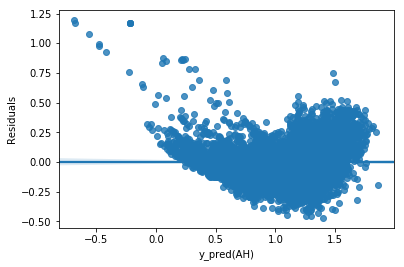

In [0]:
z3 = sm.add_constant(x_train)
y_train_pred2 = mst2.predict(z3)
resid2 = (y_train.iloc[:,1] - y_train_pred2)
sb.regplot(y_train_pred2,resid2)
plt.xlabel("y_pred(AH)")
plt.ylabel("Residuals")

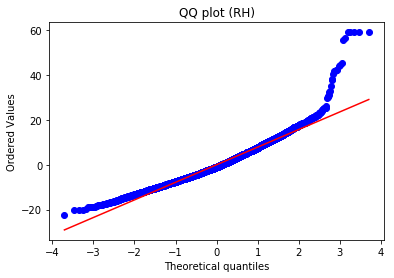

In [0]:
#checking the normality 
import pylab
stats.probplot(resid1, dist="norm", plot=pylab)
pylab.title("QQ plot (RH)")
pylab.show()
pylab.figure()

#from the plot it can be seen that the data follows normality

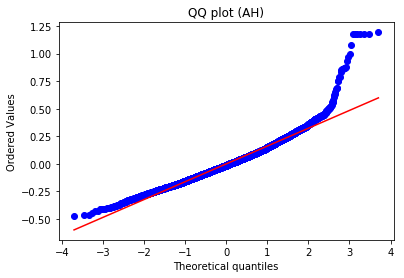

In [0]:
#checking the normality 
import pylab
stats.probplot(resid2, dist="norm", plot=pylab)
pylab.title("QQ plot (AH)")
pylab.show()
pylab.figure()

#from the plot it can be seen that the data follows normality

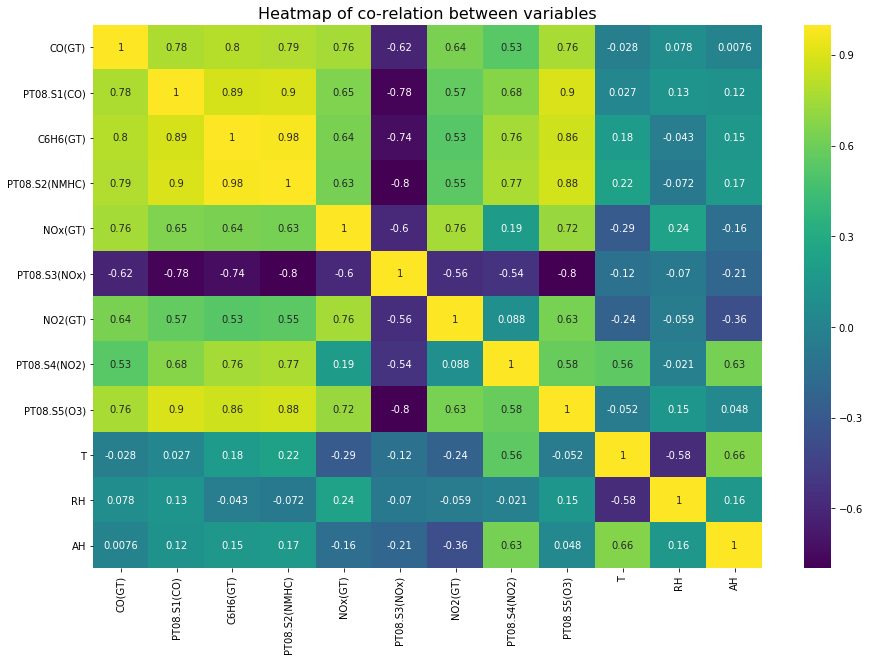

In [0]:
#Heat map of variables
plt.figure(figsize=(15,10))
sb.heatmap(dataset.iloc[:,2:-3].corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.xticks(rotation = 90)
plt.show()

#By seeing the co relation matrix we can say that there is correlation between independent variables

**checking multi collinearity with VIF**

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

In [0]:
vif 

[14.368302707128077,
 192.86285309925822,
 47.97551040333529,
 368.3632929989545,
 10.510621164284132,
 17.84364557216075,
 21.42725379488996,
 125.27920940290916,
 59.79247968937912,
 13.786709578435575]

<Container object of 3 artists>

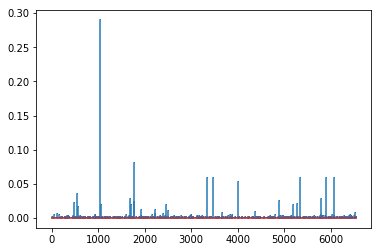

In [0]:
#check for influential points in the data

influence = est2.get_influence()

(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

#Since the cooks distance is less than one there are no influential points in data

<Container object of 3 artists>

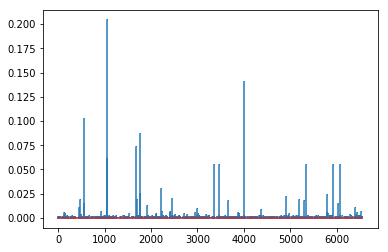

In [0]:
#check for influential points in the data

influence1 = mst2.get_influence()

(c1, p1) = influence1.cooks_distance
plt.stem(np.arange(len(c1)), c1, markerfmt=",")

#Since the cooks distance is less than one there are no influential points in data

In [0]:
x_train_tran = x_train.copy()
y_train_tran = y_train.copy()

In [0]:
def linear_regressor(x_train_s, y_train_s):
    y2 = sm.add_constant(x_train_s)
    dst = sm.OLS(y_train_s,y2)
    dst2 = dst.fit()
    return dst2

In [0]:
# #applying the backwarrd elimination to the train set

# dst2 = linear_regressor(x_train_tran,y_train_tran)
# cols = x_train_tran.columns
# print(dst2.summary())

# pcols = []
# for num,pvalue in enumerate(dst2.pvalues):
#     if pvalue >= 0.05:
#         pcols.append(cols[num-1])
 
# print(pcols)
# x_train_tran.drop(pcols,axis = 1,inplace = True)

In [0]:

from statsmodels.tsa.stattools import adfuller
def adfu(ts):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag = 'AIC')
    rolling_mean = ts.rolling(window = 24).mean()
    rolling_std = ts.rolling(window = 24).std()


#     plt.figure(figsize=(15,5))
#     original = plt.plot(ts,color="red",label="Original")
#     rolmeanplot = plt.plot(rolling_mean,color="blue",label="rollingMean")
#     rolstdplot = plt.plot(rolling_std,color="black",label="rollingStd")
#     plt.title("rolling mean and standard deviation")
#     plt.legend(loc="best")
#     plt.show(block=False)
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adfu(y.iloc[:,0])
adfu(y.iloc[:,1])


Results of Dickey-Fuller Test:
Test Statistic                -7.281607e+00
p-value                        1.495339e-10
#Lags Used                     3.800000e+01
Number of Observations Used    9.318000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -5.141627
p-value                           0.000012
#Lags Used                       25.000000
Number of Observations Used    9331.000000
Critical Value (1%)              -3.431051
Critical Value (5%)              -2.861850
Critical Value (10%)             -2.566935
dtype: float64


In [0]:
##ARIMA
data = dataset.copy()

In [0]:
indexedData = data.set_index(['DateTime'])

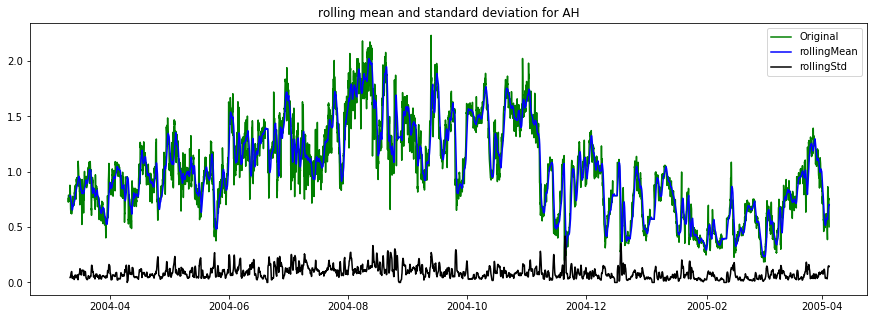

In [0]:
rolling_mean_AH = indexedData['AH'].rolling(window = 24).mean()
rolling_std_AH = indexedData['AH'].rolling(window = 24).std()


plt.figure(figsize=(15,5))
original_AH = plt.plot(indexedData['AH'],color="green",label="Original")
rolmeanplot_AH = plt.plot(rolling_mean_AH,color="blue",label="rollingMean")
rolstdplot_AH = plt.plot(rolling_std_AH,color="black",label="rollingStd")
plt.title("rolling mean and standard deviation for AH")
plt.legend(loc="best")
plt.show(block=False)



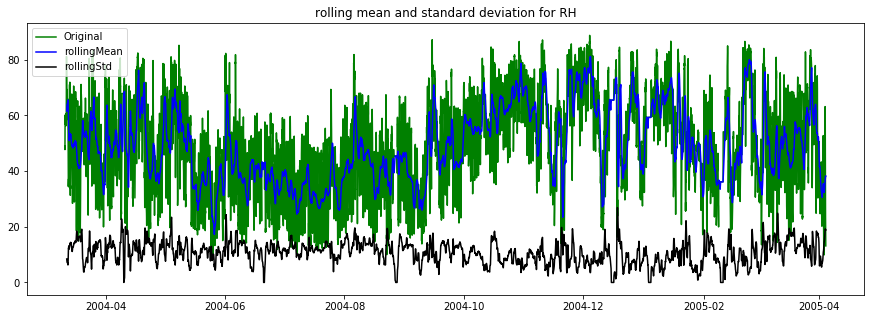

In [0]:

rolling_mean_RH = indexedData['RH'].rolling(window = 24).mean()
rolling_std_RH = indexedData['RH'].rolling(window = 24).std()


plt.figure(figsize=(15,5))
original_RH = plt.plot(indexedData['RH'],color="green",label="Original")
rolmeanplot_RH = plt.plot(rolling_mean_RH,color="blue",label="rollingMean")
rolstdplot_RH = plt.plot(rolling_std_RH,color="black",label="rollingStd")
plt.title("rolling mean and standard deviation for RH")
plt.legend(loc="best")
plt.show(block=False)



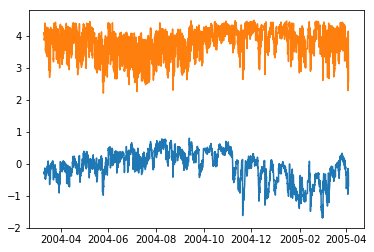

In [0]:
def getLogValues(timeseries):
  return np.log(timeseries)
indexedData_log_AH = getLogValues(indexedData.AH)
plt.plot(indexedData_log_AH)

indexedData_log_RH = getLogValues(indexedData.RH)
plt.plot(indexedData_log_RH)

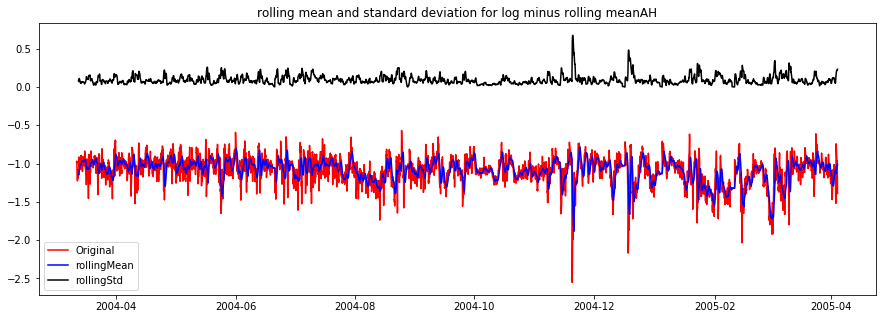

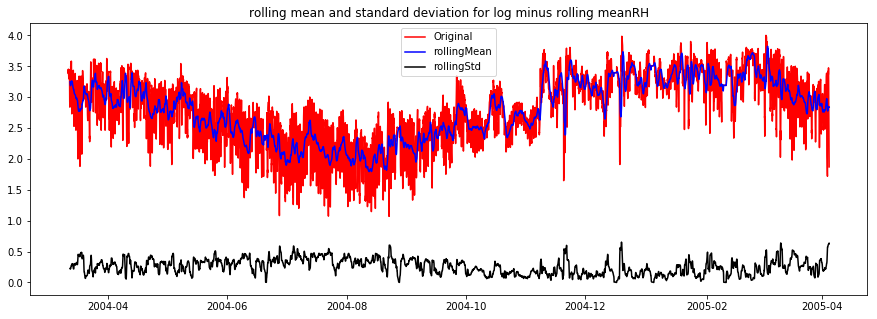

In [0]:
def plots(timeseries,name):
  rolling_mean = timeseries.rolling(window = 24).mean()
  rolling_std = timeseries.rolling(window = 24).std()


  plt.figure(figsize=(15,5))
  original = plt.plot(timeseries,color="red",label="Original")
  rolmeanplot = plt.plot(rolling_mean,color="blue",label="rollingMean")
  rolstdplot = plt.plot(rolling_std,color="black",label="rollingStd")
  plt.title("rolling mean and standard deviation for log minus rolling mean{0}".format(name))
  plt.legend(loc="best")
  plt.show(block=False)

  
def convertTostationary(timeseries,rollingmean):
  return (timeseries - rollingmean)

indexDataLogminusrollmean_AH = convertTostationary(indexedData_log_AH,rolling_mean_AH)
plots(indexDataLogminusrollmean_AH,"AH")



indexDataLogminusrollmean_RH = convertTostationary(indexedData_log_RH,rolling_mean_AH)
plots(indexDataLogminusrollmean_RH,"RH")




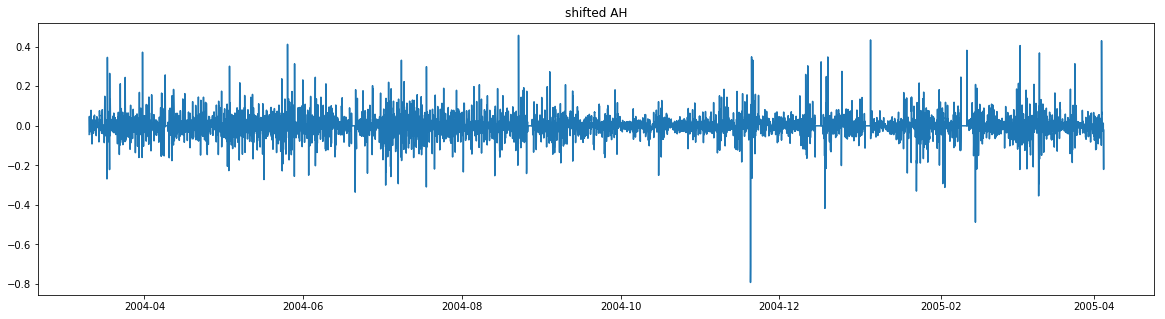

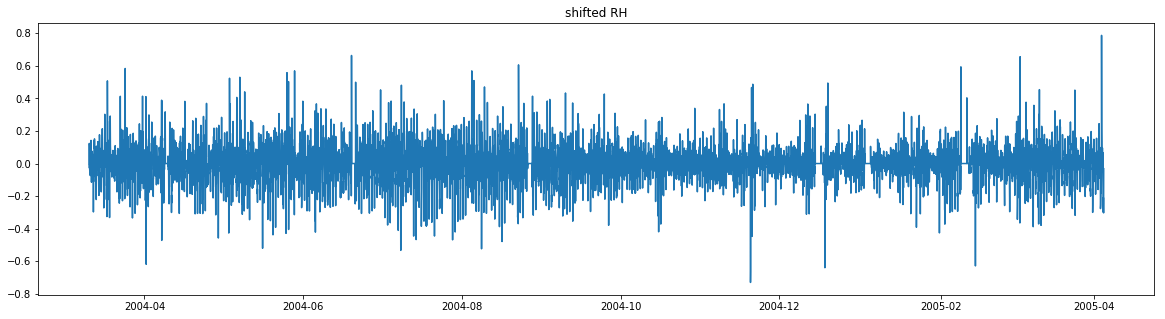

In [0]:
def shift(timeseries,name):
  plt.figure(figsize=(20,5))
  shifted =  timeseries - timeseries.shift()
  plt.title(name)
  plt.plot(shifted)
  return shifted

indexedData_AH_shift = shift(indexedData_log_AH,"shifted AH")

indexedData_RH_shift  = shift(indexedData_log_RH,"shifted RH")

In [0]:
indexedData_AH_shift.dropna(how="all")

DateTime
2004-03-10 19:00:00   -0.043515
2004-03-10 20:00:00    0.033548
2004-03-10 21:00:00    0.047471
2004-03-10 22:00:00    0.002643
2004-03-10 23:00:00   -0.005113
2004-03-11 00:00:00   -0.031664
2004-03-11 01:00:00    0.012971
2004-03-11 02:00:00   -0.007061
2004-03-11 03:00:00   -0.017359
2004-03-11 04:00:00   -0.006892
2004-03-11 05:00:00   -0.013398
2004-03-11 06:00:00   -0.001718
2004-03-11 07:00:00    0.008722
2004-03-11 08:00:00   -0.001270
2004-03-11 09:00:00    0.037512
2004-03-11 10:00:00   -0.018275
2004-03-11 11:00:00   -0.026871
2004-03-11 12:00:00    0.078321
2004-03-11 13:00:00    0.054120
2004-03-11 14:00:00    0.040079
2004-03-11 15:00:00    0.004792
2004-03-11 16:00:00   -0.024035
2004-03-11 17:00:00   -0.045891
2004-03-11 18:00:00   -0.014717
2004-03-11 19:00:00    0.030980
2004-03-11 20:00:00   -0.022620
2004-03-11 21:00:00   -0.091870
2004-03-11 22:00:00   -0.071854
2004-03-11 23:00:00   -0.036488
2004-03-12 00:00:00   -0.033574
                         ...   

In [0]:
indexedData_AH_shift.dropna(inplace=True)

In [0]:
adfu(indexedData_AH_shift)

Results of Dickey-Fuller Test:
Test Statistic                -1.862822e+01
p-value                        2.058597e-30
#Lags Used                     3.800000e+01
Number of Observations Used    9.317000e+03
Critical Value (1%)           -3.431052e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64


In [0]:
indexedData_RH_shift.dropna(inplace=True)
adfu(indexedData_RH_shift)

Results of Dickey-Fuller Test:
Test Statistic                  -19.640849
p-value                           0.000000
#Lags Used                       38.000000
Number of Observations Used    9317.000000
Critical Value (1%)              -3.431052
Critical Value (5%)              -2.861850
Critical Value (10%)             -2.566935
dtype: float64


In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompositionTimeSeries(ts):
  decomposition = seasonal_decompose(ts)
  trend =decomposition.trend
  seasonal = decomposition.seasonal
  residual = decomposition.resid
  
  
  plt.figure(figsize=(15,5))
  plt.subplot(411)
  plt.plot(ts,label = "original")
  plt.legend(loc="best")
  
  plt.subplot(412)
  plt.plot(trend,label = "trend")
  plt.legend(loc="best")
  
  plt.subplot(413)
  plt.plot(residual,label = "residual")
  plt.legend(loc="best")
  
  plt.tight_layout()
  
  
  decomposedLogData = residual
  decomposedLogData.dropna(inplace=True)
  adfu(decomposedLogData)
  
  
#decompositionTimeSeries(indexedData_RH_shift)

Results of Dickey-Fuller Test:
Test Statistic                  -26.228559
p-value                           0.000000
#Lags Used                       38.000000
Number of Observations Used    9294.000000
Critical Value (1%)              -3.431054
Critical Value (5%)              -2.861851
Critical Value (10%)             -2.566936
dtype: float64


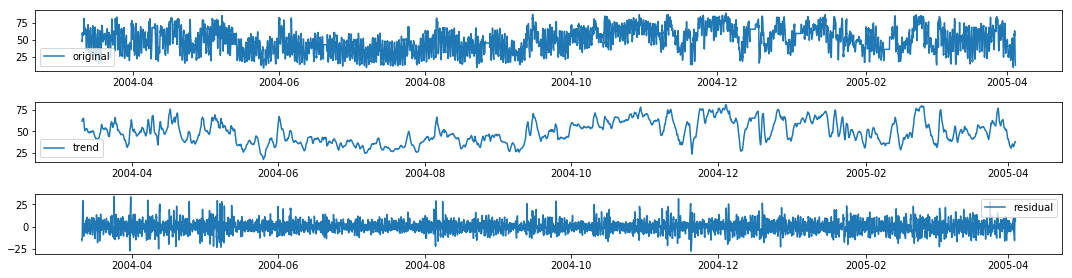

In [0]:
decompositionTimeSeries(indexedData['RH'])

In [0]:
from statsmodels.tsa.stattools import acf, pacf
def drawAcf(indexedData_AH):
  lag_acf = acf(indexedData_AH, nlags=20)
  lag_pacf = pacf(indexedData_AH, nlags=20, method='ols')
  #Plot ACF: 
  #plt.subplot(121) 
  plt.plot(lag_acf)
  plt.axhline(y=0,linestyle='--',color='gray')
  plt.axhline(y=-1.96/np.sqrt(len(indexedData_AH)),linestyle='--',color='gray')
  plt.axhline(y=1.96/np.sqrt(len(indexedData_AH)),linestyle='--',color='gray')
  plt.title('Autocorrelation Function')
  plt.show()
  #Plot PACF:
  #plt.subplot(122)
  plt.plot(lag_pacf)
  plt.axhline(y=0,linestyle='--',color='gray')
  plt.axhline(y=-1.96/np.sqrt(len(indexedData_AH)),linestyle='--',color='gray')
  plt.axhline(y=1.96/np.sqrt(len(indexedData_AH)),linestyle='--',color='gray')
  plt.title('Partial Autocorrelation Function')
  plt.show()

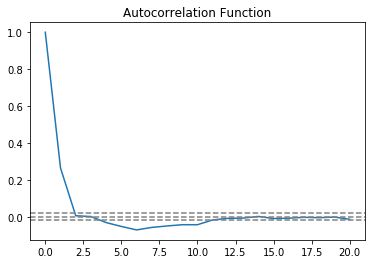

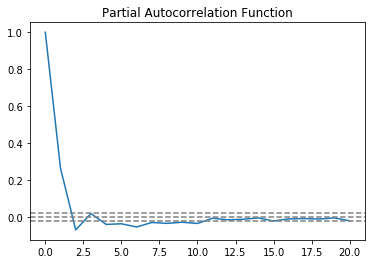

In [0]:
drawAcf(indexedData_AH_shift)

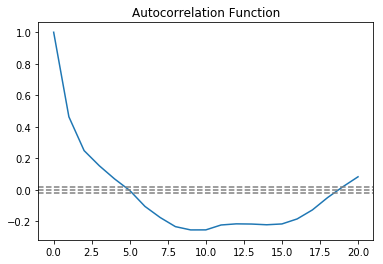

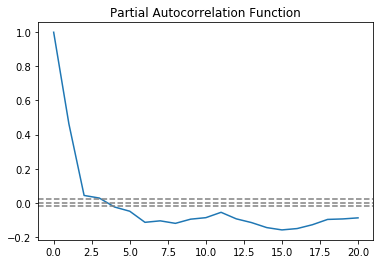

In [0]:
drawAcf(indexedData_RH_shift)

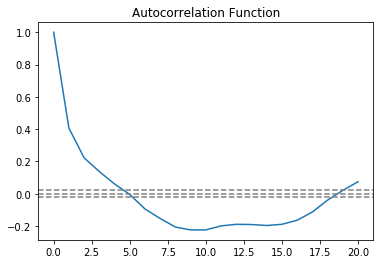

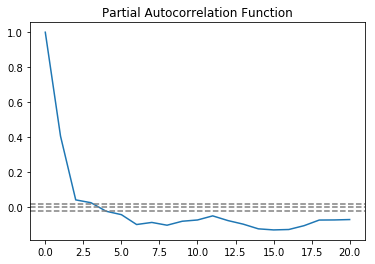

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


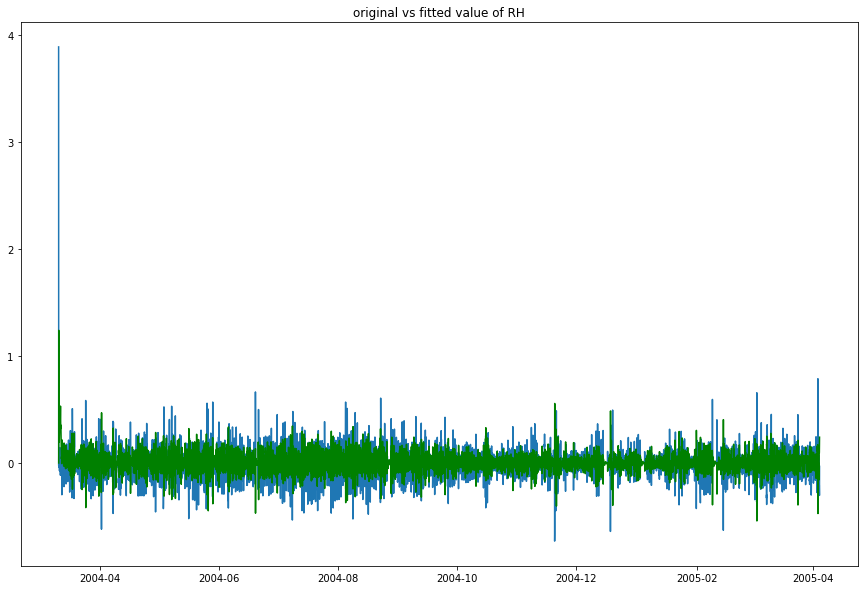

In [0]:
df = dataset.copy()
datetime = pd.Series(df.DateTime)
df.index = datetime

df.columns = ["V"+str(i) for i in range(1, len(df.columns)+1)]

data = df.V13
data1=df.V14

# #normal plotting
# fig, axes = plt.subplots(2,1, figsize=(10,15))

# axes[0].plot(df.V13)
# axes[0].set_title ('Relative Humidity')
# axes[1].plot(df.V14)
# axes[1].set_title ('Absolute Humidity')


# def adfu(ts):
#     print('Results of Dickey-Fuller Test:')
#     dftest = adfuller(ts)
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

# adfu(data)
# adfu(data1)


# from pandas.plotting import lag_plot
# lag_plot(df.V13)
# lag_plot(df.V14)

# from pandas.plotting import autocorrelation_plot
# # autocorrelation_plot(df.V13)
# autocorrelation_plot(df.V14)

# from statsmodels.graphics.tsaplots import plot_acf
# plot_acf(df.V13)

df['V14log'] = np.log(df.V13)
df["V14LogShi1"] = df.V14log.shift()
df = df.fillna(0)
df["Diff"] = df.V14log - df.V14LogShi1
ts_diff = df.Diff
ts_diff.dropna(inplace = True)




from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
#Plot ACF: 
#plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
#Plot PACF:
#plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()
# #p=2 q=1



from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_diff, order=(3,1,5))  
results_ARIMA = model.fit(disp=-1) 
plt.figure(figsize=(15,10))
plt.plot(ts_diff)
plt.title("original vs fitted value of RH")
plt.plot(results_ARIMA.fittedvalues, color='green')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_diff)**2))


In [0]:
# 